In [2]:
import pandas as pd
import os
from datetime import datetime 
import seaborn as sns
import matplotlib.pyplot as plt

In [272]:
fixture_data_path = '../Data/RAW/FBREF_Dataset/ligue-1_2023-2024_fixture_data.csv'
player_data_path = '../Data/RAW//FBREF_Dataset/ligue-1_2023-2024_player_data.csv'

In [273]:
fixture_raw = pd.read_csv(fixture_data_path)

In [4]:
pd.set_option('display.max_columns', None)

In [275]:
fixture_raw.head(10)

,Wk,Day,Date,Time,Home,Away,xG,xG.1,Score,season,game_id
0,1.0,Fri,2023-08-11,21:00,Nice,Lille,1.2,1.3,1–1,2023-2024,0
1,1.0,Sat,2023-08-12,17:00,Marseille,Reims,1.0,0.8,2–1,2023-2024,1
2,1.0,Sat,2023-08-12,21:00,Paris S-G,Lorient,1.2,0.1,0–0,2023-2024,2
3,1.0,Sun,2023-08-13,13:00,Brest,Lens,2.5,0.7,3–2,2023-2024,3
4,1.0,Sun,2023-08-13,15:00,Nantes,Toulouse,1.1,1.1,1–2,2023-2024,4
5,1.0,Sun,2023-08-13,15:00,Clermont Foot,Monaco,1.8,2.5,2–4,2023-2024,5
6,1.0,Sun,2023-08-13,15:00,Montpellier,Le Havre,1.6,1.0,2–2,2023-2024,6
7,1.0,Sun,2023-08-13,17:05,Rennes,Metz,4.0,0.4,5–1,2023-2024,7
8,1.0,Sun,2023-08-13,20:45,Strasbourg,Lyon,1.3,1.7,2–1,2023-2024,8
9,2.0,Fri,2023-08-18,21:00,Metz,Marseille,0.5,1.9,2–2,2023-2024,9


In [276]:
fixture_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Wk       306 non-null    float64
 1   Day      306 non-null    object 
 2   Date     306 non-null    object 
 3   Time     306 non-null    object 
 4   Home     306 non-null    object 
 5   Away     306 non-null    object 
 6   xG       306 non-null    float64
 7   xG.1     306 non-null    float64
 8   Score    306 non-null    object 
 9   season   306 non-null    object 
 10  game_id  306 non-null    int64  
dtypes: float64(3), int64(1), object(7)
memory usage: 26.4+ KB


In [277]:
# fixture_raw.describe()

In [278]:
fixture_raw.isnull().sum()

Wk         0
Day        0
Date       0
Time       0
Home       0
Away       0
xG         0
xG.1       0
Score      0
season     0
game_id    0
dtype: int64

In [279]:
player_raw = pd.read_csv(player_data_path)

In [280]:
player_raw.head(18)

,index,Player,#,Nation,Pos,Age,Min,Gls,Ast,PK,PKatt,Sh,SoT,CrdY,CrdR,Touches,Tkl,Int,Blocks,xG,npxG,xAG,SCA,GCA,Cmp_x,Att_x,Cmp%_x,PrgP,Carries,PrgC,Att_x.1,Succ,SoTA,GA,Saves,Save%,PSxG,Cmp_y,Att_y,Cmp%_y,Att (GK),Thr,Launch%,AvgLen,Att_y.1,Launch%.1,AvgLen.1,Opp,Stp,Stp%,#OPA,AvgDist,home,game_id
0,0,16 Players,NaN,NaN,NaN,NaN,990,1.0,1.0,0.0,0.0,8.0,3.0,3.0,0.0,525.0,16.0,7.0,8.0,1.2,1.2,1.1,16.0,2.0,347.0,422.0,82.2,16.0,404.0,21.0,39.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
1,1,Dante,4.0,br BRA,CB,39-297,90,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,54.0,1.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,42.0,48.0,87.5,1.0,42.0,0.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
2,2,Evann Guessand,29.0,ci CIV,RW,22-041,33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,6.0,9.0,66.7,2.0,10.0,3.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
3,3,Gaëtan Laborde,24.0,fr FRA,RW,29-100,57,1.0,0.0,0.0,0.0,2.0,2.0,1.0,0.0,21.0,0.0,0.0,0.0,0.5,0.5,0.0,1.0,0.0,9.0,16.0,56.3,1.0,18.0,4.0,5.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
4,4,Hicham Boudaoui,28.0,dz ALG,FW,23-322,10,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,8.0,10.0,80.0,1.0,9.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
5,5,Jean-Clair Todibo,6.0,fr FRA,CB,23-224,90,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,46.0,53.0,86.8,0.0,47.0,0.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
6,6,Jeremie Boga,7.0,ci CIV,LW,26-220,56,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,13.0,15.0,86.7,0.0,19.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
7,7,Jordan Lotomba,23.0,ch SUI,RB,24-316,45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,19.0,84.2,2.0,18.0,1.0,4.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
8,8,Khéphren Thuram,19.0,fr FRA,LM,22-138,56,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,29.0,4.0,1.0,1.0,0.0,0.0,0.6,4.0,1.0,15.0,19.0,78.9,2.0,20.0,3.0,6.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
9,9,Marcin Bułka,90.0,pl POL,GK,23-311,90,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,56.0,89.3,0.0,50.0,0.0,0.0,0.0,5.0,1.0,4.0,80.0,2.1,7.0,10.0,70.0,52.0,10.0,15.4,27.6,4.0,50.0,40.0,14.0,1.0,7.1,0.0,8.8,1,0


In [281]:
player_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9397 entries, 0 to 9396
Data columns (total 54 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   index      9397 non-null   int64  
 1   Player     9397 non-null   object 
 2   #          8782 non-null   float64
 3   Nation     8785 non-null   object 
 4   Pos        8782 non-null   object 
 5   Age        8785 non-null   object 
 6   Min        9397 non-null   int64  
 7   Gls        9394 non-null   float64
 8   Ast        9394 non-null   float64
 9   PK         9394 non-null   float64
 10  PKatt      9394 non-null   float64
 11  Sh         9394 non-null   float64
 12  SoT        9394 non-null   float64
 13  CrdY       9394 non-null   float64
 14  CrdR       9394 non-null   float64
 15  Touches    9394 non-null   float64
 16  Tkl        9394 non-null   float64
 17  Int        9394 non-null   float64
 18  Blocks     9394 non-null   float64
 19  xG         9394 non-null   float64
 20  npxG    

In [282]:
# player_raw.describe()

In [283]:
player_raw.isnull().sum()

index           0
Player          0
#             615
Nation        612
Pos           615
Age           612
Min             0
Gls             3
Ast             3
PK              3
PKatt           3
Sh              3
SoT             3
CrdY            3
CrdR            3
Touches         3
Tkl             3
Int             3
Blocks          3
xG              3
npxG            3
xAG             3
SCA             3
GCA             3
Cmp_x           3
Att_x           3
Cmp%_x        105
PrgP            3
Carries         3
PrgC            3
Att_x.1         3
Succ            3
SoTA         8829
GA           8831
Saves        8829
Save%        8847
PSxG         8828
Cmp_y        8830
Att_y        8829
Cmp%_y       8842
Att (GK)     8829
Thr          8829
Launch%      8830
AvgLen       8829
Att_y.1      8829
Launch%.1    8838
AvgLen.1     8837
Opp          8828
Stp          8831
Stp%         8832
#OPA         8831
AvgDist      8857
home            0
game_id         0
dtype: int64

In [284]:
merged_player_raw = player_raw.merge(fixture_raw[['Home', 'Away', 'game_id', 'Wk', 'season', 'Date']], left_on='game_id', right_on='game_id', how='left')
merged_player_raw['Team Name'] = merged_player_raw.apply(lambda row: row['Home'] if row['home'] == 1 else row['Away'], axis=1)
merged_player_raw.drop(['Home', 'Away', 'index'], axis=1, inplace=True)

print(merged_player_raw['Age'])
merged_player_raw.head(15)


0          NaN
1       39-297
2       22-041
3       29-100
4       23-322
         ...  
9392    23-054
9393    24-228
9394    20-121
9395    27-133
9396    24-360
Name: Age, Length: 9397, dtype: object


,Player,#,Nation,Pos,Age,Min,Gls,Ast,PK,PKatt,Sh,SoT,CrdY,CrdR,Touches,Tkl,Int,Blocks,xG,npxG,xAG,SCA,GCA,Cmp_x,Att_x,Cmp%_x,PrgP,Carries,PrgC,Att_x.1,Succ,SoTA,GA,Saves,Save%,PSxG,Cmp_y,Att_y,Cmp%_y,Att (GK),Thr,Launch%,AvgLen,Att_y.1,Launch%.1,AvgLen.1,Opp,Stp,Stp%,#OPA,AvgDist,home,game_id,Wk,season,Date,Team Name
0,16 Players,NaN,NaN,NaN,NaN,990,1.0,1.0,0.0,0.0,8.0,3.0,3.0,0.0,525.0,16.0,7.0,8.0,1.2,1.2,1.1,16.0,2.0,347.0,422.0,82.2,16.0,404.0,21.0,39.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,1.0,2023-2024,2023-08-11,Nice
1,Dante,4.0,br BRA,CB,39-297,90,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,54.0,1.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,42.0,48.0,87.5,1.0,42.0,0.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,1.0,2023-2024,2023-08-11,Nice
2,Evann Guessand,29.0,ci CIV,RW,22-041,33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,6.0,9.0,66.7,2.0,10.0,3.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,1.0,2023-2024,2023-08-11,Nice
3,Gaëtan Laborde,24.0,fr FRA,RW,29-100,57,1.0,0.0,0.0,0.0,2.0,2.0,1.0,0.0,21.0,0.0,0.0,0.0,0.5,0.5,0.0,1.0,0.0,9.0,16.0,56.3,1.0,18.0,4.0,5.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,1.0,2023-2024,2023-08-11,Nice
4,Hicham Boudaoui,28.0,dz ALG,FW,23-322,10,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,8.0,10.0,80.0,1.0,9.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,1.0,2023-2024,2023-08-11,Nice
5,Jean-Clair Todibo,6.0,fr FRA,CB,23-224,90,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,46.0,53.0,86.8,0.0,47.0,0.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,1.0,2023-2024,2023-08-11,Nice
6,Jeremie Boga,7.0,ci CIV,LW,26-220,56,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,13.0,15.0,86.7,0.0,19.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,1.0,2023-2024,2023-08-11,Nice
7,Jordan Lotomba,23.0,ch SUI,RB,24-316,45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,19.0,84.2,2.0,18.0,1.0,4.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,1.0,2023-2024,2023-08-11,Nice
8,Khéphren Thuram,19.0,fr FRA,LM,22-138,56,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,29.0,4.0,1.0,1.0,0.0,0.0,0.6,4.0,1.0,15.0,19.0,78.9,2.0,20.0,3.0,6.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,1.0,2023-2024,2023-08-11,Nice
9,Marcin Bułka,90.0,pl POL,GK,23-311,90,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,56.0,89.3,0.0,50.0,0.0,0.0,0.0,5.0,1.0,4.0,80.0,2.1,7.0,10.0,70.0,52.0,10.0,15.4,27.6,4.0,50.0,40.0,14.0,1.0,7.1,0.0,8.8,1,0,1.0,2023-2024,2023-08-11,Nice


In [32]:
clean_data_GK_path = '../Data/Clean/GK.csv'
clean_data_Team_path = '../Data/Clean/Team.csv'
clean_data_Player_path = '../Data/Clean/Player.csv'

In [286]:
grouped_position = merged_player_raw.groupby(merged_player_raw.Pos)
df_GK = grouped_position.get_group("GK")

df_Team = merged_player_raw[merged_player_raw['Pos'].isna()]

df_Player = merged_player_raw[(merged_player_raw['Pos'] != "GK") & (merged_player_raw['Pos'].notna())]

In [287]:
if not os.path.exists(clean_data_GK_path):
    df_GK.to_csv(clean_data_GK_path, index=False)
else:
    df_GK.to_csv(clean_data_GK_path, mode='a', header=False, index=False)



if not os.path.exists(clean_data_Team_path):
    df_Team.to_csv(clean_data_Team_path, index=False)
else:
    df_Team.to_csv(clean_data_Team_path, mode='a', header=False, index=False)


if not os.path.exists(clean_data_Player_path):
    df_Player.to_csv(clean_data_Player_path, index=False)
else:
    df_Player.to_csv(clean_data_Player_path, mode='a', header=False, index=False)

### Checking initial cleaned data

In [26]:
check = pd.read_csv('../Data/Clean/Player.csv')
check.head(10)

,Player,#,Nation,Pos,Age,Min,Gls,Ast,PK,PKatt,Sh,SoT,CrdY,CrdR,Touches,Tkl,Int,Blocks,xG,npxG,xAG,SCA,GCA,Cmp_x,Att_x,Cmp%_x,PrgP,Carries,PrgC,Att_x.1,Succ,SoTA,GA,Saves,Save%,PSxG,Cmp_y,Att_y,Cmp%_y,Att (GK),Thr,Launch%,AvgLen,Att_y.1,Launch%.1,AvgLen.1,Opp,Stp,Stp%,#OPA,AvgDist,home,game_id,Wk,season,Date,Team Name
0,Ameen Al-Dakhil,28.0,be BEL,CB,21-158,90.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,51.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,32.0,38.0,84.2,3.0,24.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,1.0,2023-2024,2023-08-11,Burnley
1,Anass Zaroury,19.0,ma MAR,FW,22-277,29.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,10.0,12.0,83.3,0.0,6.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,1.0,2023-2024,2023-08-11,Burnley
2,Benson Manuel,10.0,ao ANG,FW,26-136,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,5.0,80.0,0.0,7.0,1.0,4.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,1.0,2023-2024,2023-08-11,Burnley
3,Connor Roberts,14.0,wls WAL,RB,27-322,90.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,51.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39.0,46.0,84.8,4.0,17.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,1.0,2023-2024,2023-08-11,Burnley
4,Dara O'Shea,2.0,ie IRL,CB,24-160,90.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,42.0,56.0,75.0,3.0,27.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,1.0,2023-2024,2023-08-11,Burnley
5,Jacob Bruun Larsen,34.0,dk DEN,RM,24-326,30.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,6.0,66.7,2.0,4.0,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,1.0,2023-2024,2023-08-11,Burnley
6,Jordan Beyer,5.0,de GER,CB,23-084,73.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0,4.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0,28.0,35.0,80.0,0.0,21.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,1.0,2023-2024,2023-08-11,Burnley
7,Josh Brownhill,8.0,eng ENG,CM,27-235,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,100.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,1.0,2023-2024,2023-08-11,Burnley
8,Josh Cullen,24.0,ie IRL,CM,27-126,90.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,37.0,43.0,86.0,2.0,16.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,1.0,2023-2024,2023-08-11,Burnley
9,Luca Koleosho,30.0,it ITA,RM,18-330,60.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,23.0,0.0,0.0,0.0,0.1,0.1,0.1,2.0,0.0,8.0,14.0,57.1,0.0,18.0,1.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,1.0,2023-2024,2023-08-11,Burnley


In [6]:
check.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3174 entries, 0 to 3173
Data columns (total 57 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Player     3174 non-null   object 
 1   #          3174 non-null   float64
 2   Nation     3174 non-null   object 
 3   Pos        3174 non-null   object 
 4   Age        3174 non-null   object 
 5   Min        3174 non-null   float64
 6   Gls        3174 non-null   float64
 7   Ast        3174 non-null   float64
 8   PK         3174 non-null   float64
 9   PKatt      3174 non-null   float64
 10  Sh         3174 non-null   float64
 11  SoT        3174 non-null   float64
 12  CrdY       3174 non-null   float64
 13  CrdR       3174 non-null   float64
 14  Touches    3174 non-null   float64
 15  Tkl        3174 non-null   float64
 16  Int        3174 non-null   float64
 17  Blocks     3174 non-null   float64
 18  xG         3174 non-null   float64
 19  npxG       3174 non-null   float64
 20  xAG     

In [7]:
check.isnull().sum()

Player         0
#              0
Nation         0
Pos            0
Age            0
Min            0
Gls            0
Ast            0
PK             0
PKatt          0
Sh             0
SoT            0
CrdY           0
CrdR           0
Touches        0
Tkl            0
Int            0
Blocks         0
xG             0
npxG           0
xAG            0
SCA            0
GCA            0
Cmp_x          0
Att_x          0
Cmp%_x         1
PrgP           0
Carries        0
PrgC           0
Att_x.1        0
Succ           0
SoTA           7
GA            26
Saves         11
Save%         98
PSxG           4
Cmp_y         12
Att_y          5
Cmp%_y        52
Att (GK)       7
Thr           12
Launch%       19
AvgLen         8
Att_y.1        7
Launch%.1     68
AvgLen.1      57
Opp            6
Stp           25
Stp%          30
#OPA          32
AvgDist      165
home           0
game_id        0
Wk             0
season         0
Date           0
Team Name      0
dtype: int64

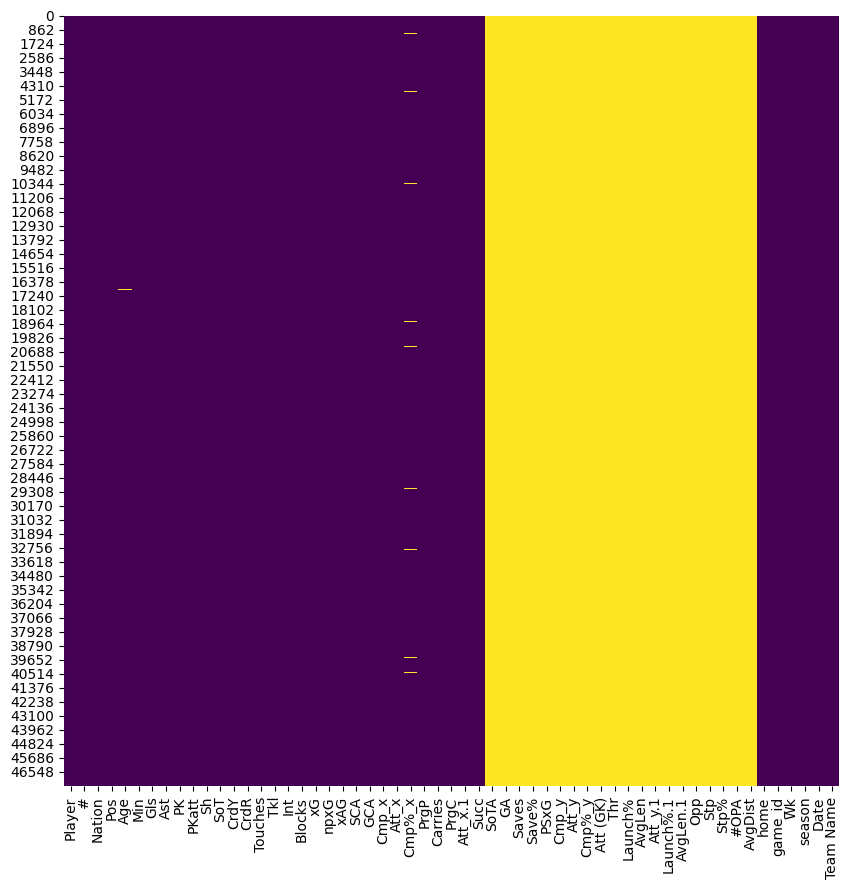

In [27]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(check.isnull(), cbar=False, xticklabels=True, cmap="viridis", ax=ax)
plt.show()

In [22]:
print(check.loc[check['Cmp%_y'].isna()])

                         Player     #   Nation Pos     Age   Min  Gls  Ast  \
298                     José Sá   1.0   pt POR  GK  30-326  90.0  0.0  0.0   
300             Bart Verbruggen   1.0   nl NED  GK  21-113  90.0  0.0  0.0   
318             Martin Dúbravka   1.0   sk SVK  GK  34-335  90.0  0.0  0.0   
361                  David Raya  22.0   es ESP  GK  28-104  90.0  0.0  0.0   
449                  David Raya  22.0   es ESP  GK  28-149  90.0  0.0  0.0   
467             Bart Verbruggen   1.0   nl NED  GK  21-184  90.0  0.0  0.0   
497                     José Sá   1.0   pt POR  GK  31-045  45.0  0.0  0.0   
632             Martin Dúbravka   1.0   sk SVK  GK  35-103  90.0  0.0  0.0   
638           Guglielmo Vicario  13.0   it ITA  GK  27-204  90.0  0.0  0.0   
643                     Ederson  31.0   br BRA  GK  30-255  45.0  0.0  0.0   
644           Guglielmo Vicario  13.0   it ITA  GK  27-208  90.0  0.0  0.0   
691                Jason Steele  23.0  eng ENG  GK  33-275  90.0

In [24]:
all_nan_players = {}
for attribute in check.columns[1:]:  # Exclude 'Player' column
    players = check.groupby('Player')[attribute].apply(lambda x: x.isna().all())
    all_nan_players[attribute] = players[players].index.tolist()

# Output results
for attribute, players in all_nan_players.items():
    print(f"Players with all NaN in '{attribute}': {players}")

Players with all NaN in '#': []
Players with all NaN in 'Nation': []
Players with all NaN in 'Pos': []
Players with all NaN in 'Age': []
Players with all NaN in 'Min': []
Players with all NaN in 'Gls': []
Players with all NaN in 'Ast': []
Players with all NaN in 'PK': []
Players with all NaN in 'PKatt': []
Players with all NaN in 'Sh': []
Players with all NaN in 'SoT': []
Players with all NaN in 'CrdY': []
Players with all NaN in 'CrdR': []
Players with all NaN in 'Touches': []
Players with all NaN in 'Tkl': []
Players with all NaN in 'Int': []
Players with all NaN in 'Blocks': []
Players with all NaN in 'xG': []
Players with all NaN in 'npxG': []
Players with all NaN in 'xAG': []
Players with all NaN in 'SCA': []
Players with all NaN in 'GCA': []
Players with all NaN in 'Cmp_x': []
Players with all NaN in 'Att_x': []
Players with all NaN in 'Cmp%_x': []
Players with all NaN in 'PrgP': []
Players with all NaN in 'Carries': []
Players with all NaN in 'PrgC': []
Players with all NaN in '

In [345]:
print(check.loc[(check['Player'] == 'Diego Llorente') & (check['game_id'] == 328)])

               Player     #  Nation Pos     Age  Min  Gls  Ast   PK  PKatt  \
18989  Diego Llorente  14.0  es ESP  CB  30-253  9.0  0.0  0.0  0.0    0.0   
18990  Diego Llorente  14.0  es ESP  CB  30-253  9.0  0.0  0.0  0.0    0.0   

        Sh  SoT  CrdY  CrdR  Touches  Tkl  Int  Blocks   xG  npxG  xAG  SCA  \
18989  0.0  0.0   0.0   0.0     60.0  1.0  0.0     0.0  0.0   0.0  0.0  1.0   
18990  0.0  0.0   0.0   0.0     60.0  1.0  0.0     0.0  0.0   0.0  0.0  1.0   

       GCA  Cmp_x  Att_x  Cmp%_x  PrgP  Carries  PrgC  Att_x.1  Succ  SoTA  \
18989  1.0   48.0   55.0    87.3   3.0     25.0   1.0      0.0   0.0   NaN   
18990  1.0   48.0   55.0    87.3   3.0     25.0   1.0      0.0   0.0   NaN   

       GA  Saves  Save%  PSxG  Cmp_y  Att_y  Cmp%_y  Att (GK)  Thr  Launch%  \
18989 NaN    NaN    NaN   NaN    NaN    NaN     NaN       NaN  NaN      NaN   
18990 NaN    NaN    NaN   NaN    NaN    NaN     NaN       NaN  NaN      NaN   

       AvgLen  Att_y.1  Launch%.1  AvgLen.1  Opp  Stp 

In [ ]:
check.loc[(check['Player'] == 'Diego Llorente') & (check['game_id'] == 328), 'Min'] = 9
#check.drop('Country', axis='columns')

In [33]:
duplicate = check[check.duplicated()]
 
print("Duplicate Rows :")
 
# Print the resultant Dataframe
duplicate

Duplicate Rows :


,Player,#,Nation,Pos,Age,Min,Gls,Ast,PK,PKatt,Sh,SoT,CrdY,CrdR,Touches,Tkl,Int,Blocks,xG,npxG,xAG,SCA,GCA,Cmp_x,Att_x,Cmp%_x,PrgP,Carries,PrgC,Att_x.1,Succ,SoTA,GA,Saves,Save%,PSxG,Cmp_y,Att_y,Cmp%_y,Att (GK),Thr,Launch%,AvgLen,Att_y.1,Launch%.1,AvgLen.1,Opp,Stp,Stp%,#OPA,AvgDist,home,game_id,Wk,season,Date,Team Name


In [ ]:
check = check.drop_duplicates()

,Player,#,Nation,Pos,Age,Min,Gls,Ast,PK,PKatt,Sh,SoT,CrdY,CrdR,Touches,Tkl,Int,Blocks,xG,npxG,xAG,SCA,GCA,Cmp_x,Att_x,Cmp%_x,PrgP,Carries,PrgC,Att_x.1,Succ,SoTA,GA,Saves,Save%,PSxG,Cmp_y,Att_y,Cmp%_y,Att (GK),Thr,Launch%,AvgLen,Att_y.1,Launch%.1,AvgLen.1,Opp,Stp,Stp%,#OPA,AvgDist,home,game_id,Wk,season,Date,Team Name
0,Ameen Al-Dakhil,28.0,be BEL,CB,21-158,90.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,51.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,32.0,38.0,84.2,3.0,24.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,1.0,2023-2024,2023-08-11,Burnley
1,Anass Zaroury,19.0,ma MAR,FW,22-277,29.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,10.0,12.0,83.3,0.0,6.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,1.0,2023-2024,2023-08-11,Burnley
2,Benson Manuel,10.0,ao ANG,FW,26-136,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,5.0,80.0,0.0,7.0,1.0,4.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,1.0,2023-2024,2023-08-11,Burnley
3,Connor Roberts,14.0,wls WAL,RB,27-322,90.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,51.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39.0,46.0,84.8,4.0,17.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,1.0,2023-2024,2023-08-11,Burnley
4,Dara O'Shea,2.0,ie IRL,CB,24-160,90.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,42.0,56.0,75.0,3.0,27.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,1.0,2023-2024,2023-08-11,Burnley
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47393,Jordan Lotomba,23.0,ch SUI,"LB,WB",25-233,26.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,15.0,1.0,2.0,0.0,0.2,0.2,0.0,0.0,0.0,6.0,9.0,66.7,0.0,9.0,1.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,305,34.0,2023-2024,2024-05-19,Nice
47394,Khéphren Thuram,19.0,fr FRA,"CM,DM",23-054,90.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,54.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,40.0,46.0,87.0,2.0,43.0,0.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,305,34.0,2023-2024,2024-05-19,Nice
47395,Mohamed Ali Cho,25.0,fr FRA,"RW,LW",20-121,17.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.1,1.0,0.0,4.0,4.0,100.0,1.0,5.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,305,34.0,2023-2024,2024-05-19,Nice
47396,Pablo Rosario,8.0,nl NED,CB,27-133,90.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,63.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,52.0,56.0,92.9,3.0,52.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,305,34.0,2023-2024,2024-05-19,Nice


In [34]:
check.to_csv(clean_data_Player_path, index=False)

### Cont cleaning

In [293]:
transfers = pd.read_csv('../Data/RAW/Transfermarkt_Dataset/transfers.csv')
transfers.head(10)

,player_id,transfer_date,transfer_season,from_club_id,to_club_id,from_club_name,to_club_name,transfer_fee,market_value_in_eur,player_name
0,195778,2026-06-30,25/26,79,27,VfB Stuttgart,Bayern Munich,0.0,12000000.0,Alexander Nübel
1,569033,2026-06-30,25/26,39,27,1.FSV Mainz 05,Bayern Munich,0.0,4000000.0,Armindo Sieb
2,626913,2026-06-30,25/26,398,380,Lazio,Salernitana,0.0,15000000.0,Boulaye Dia
3,1047109,2026-06-30,25/26,2672,265,APO Levadiakos,Panathinaikos,0.0,100000.0,Georgios Katris
4,360791,2025-12-31,25/26,6418,1030,Panetolikos,Argentinos Jrs.,0.0,1200000.0,Lucas Chaves
5,532536,2025-10-24,24/25,2451,1519,Inverness CT,Dundee United,0.0,150000.0,Jack Newman
6,1038821,2025-07-31,25/26,3837,11204,Fredrikstad,Stade Reims B,0.0,100000.0,Fallou Fall
7,55336,2025-07-01,25/26,3719,123,Khimki,Retired,NaN,150000.0,Denis Glushakov
8,149729,2025-07-01,25/26,294,114,Benfica,Besiktas,2000000.0,3800000.0,João Mário
9,160506,2025-07-01,25/26,206,515,Bröndby IF,Without Club,0.0,1500000.0,Josip Radosevic


In [294]:
transfers.isnull().sum()

player_id                  0
transfer_date              0
transfer_season            0
from_club_id               0
to_club_id                 0
from_club_name             0
to_club_name               0
transfer_fee           27162
market_value_in_eur    29693
player_name                0
dtype: int64

In [295]:
player_valuations = pd.read_csv('../Data/RAW/Transfermarkt_Dataset/player_valuations.csv')
player_valuations.head(10)

,player_id,date,market_value_in_eur,current_club_id,player_club_domestic_competition_id
0,405973,2000-01-20,150000,3057,BE1
1,342216,2001-07-20,100000,1241,SC1
2,3132,2003-12-09,400000,126,TR1
3,6893,2003-12-15,900000,984,GB1
4,10,2004-10-04,7000000,398,IT1
5,26,2004-10-04,1500000,16,L1
6,65,2004-10-04,8000000,1091,GR1
7,77,2004-10-04,13000000,506,IT1
8,80,2004-10-04,400000,27,L1
9,109,2004-10-04,9500000,825,TR1


In [296]:
player_valuations.isnull().sum()

player_id                              0
date                                   0
market_value_in_eur                    0
current_club_id                        0
player_club_domestic_competition_id    0
dtype: int64

In [297]:
players = pd.read_csv('../Data/RAW/Transfermarkt_Dataset/players.csv')
players.head(10)

,player_id,first_name,last_name,name,last_season,current_club_id,player_code,country_of_birth,city_of_birth,country_of_citizenship,date_of_birth,sub_position,position,foot,height_in_cm,contract_expiration_date,agent_name,image_url,url,current_club_domestic_competition_id,current_club_name,market_value_in_eur,highest_market_value_in_eur
0,10,Miroslav,Klose,Miroslav Klose,2015,398,miroslav-klose,Poland,Opole,Germany,1978-06-09 00:00:00,Centre-Forward,Attack,right,184.0,NaN,ASBW Sport Marketing,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/miroslav-klose...,IT1,Società Sportiva Lazio S.p.A.,1000000.0,30000000.0
1,26,Roman,Weidenfeller,Roman Weidenfeller,2017,16,roman-weidenfeller,Germany,Diez,Germany,1980-08-06 00:00:00,Goalkeeper,Goalkeeper,left,190.0,NaN,Neubauer 13 GmbH,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/roman-weidenfe...,L1,Borussia Dortmund,750000.0,8000000.0
2,65,Dimitar,Berbatov,Dimitar Berbatov,2015,1091,dimitar-berbatov,Bulgaria,Blagoevgrad,Bulgaria,1981-01-30 00:00:00,Centre-Forward,Attack,NaN,NaN,NaN,CSKA-AS-23 Ltd.,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/dimitar-berbat...,GR1,Panthessalonikios Athlitikos Omilos Konstantin...,1000000.0,34500000.0
3,77,NaN,Lúcio,Lúcio,2012,506,lucio,Brazil,Brasília,Brazil,1978-05-08 00:00:00,Centre-Back,Defender,NaN,NaN,NaN,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/lucio/profil/s...,IT1,Juventus Football Club,200000.0,24500000.0
4,80,Tom,Starke,Tom Starke,2017,27,tom-starke,East Germany (GDR),Freital,Germany,1981-03-18 00:00:00,Goalkeeper,Goalkeeper,right,194.0,NaN,IFM,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/tom-starke/pro...,L1,FC Bayern München,100000.0,3000000.0
5,109,NaN,Dedê,Dedê,2013,825,dede,Brazil,Belo Horizonte,Brazil,1978-04-18 00:00:00,Left-Back,Defender,NaN,NaN,NaN,Football Concept,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/dede/profil/sp...,TR1,Eskisehirspor,400000.0,9500000.0
6,123,Christoph,Metzelder,Christoph Metzelder,2012,33,christoph-metzelder,Germany,Haltern,Germany,1980-11-05 00:00:00,Centre-Back,Defender,NaN,NaN,NaN,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/christoph-metz...,L1,FC Schalke 04,1500000.0,9500000.0
7,132,Tomas,Rosicky,Tomas Rosicky,2015,11,tomas-rosicky,CSSR,Praha,Czech Republic,1980-10-04 00:00:00,Attacking Midfield,Midfield,both,179.0,NaN,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/tomas-rosicky/...,GB1,Arsenal Football Club,350000.0,17500000.0
8,162,Marc,Ziegler,Marc Ziegler,2012,79,marc-ziegler,Germany,Blieskastel,Germany,1976-06-13 00:00:00,Goalkeeper,Goalkeeper,right,193.0,NaN,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/marc-ziegler/p...,L1,Verein für Bewegungsspiele Stuttgart 1893,200000.0,1250000.0
9,215,Roque,Santa Cruz,Roque Santa Cruz,2015,1084,roque-santa-cruz,Paraguay,Asunción,Paraguay,1981-08-16 00:00:00,Centre-Forward,Attack,right,193.0,2023-12-31 00:00:00,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/roque-santa-cr...,ES1,Málaga CF,250000.0,12000000.0


In [298]:
players.isnull().sum()

player_id                                   0
first_name                               2058
last_name                                   0
name                                        0
last_season                                 0
current_club_id                             0
player_code                                 0
country_of_birth                         2806
city_of_birth                            2464
country_of_citizenship                    380
date_of_birth                              47
sub_position                              185
position                                    0
foot                                     2594
height_in_cm                             2337
contract_expiration_date                12117
agent_name                              15998
image_url                                   0
url                                         0
current_club_domestic_competition_id        0
current_club_name                           0
market_value_in_eur               